In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/clip_labels.csv')

df.head()

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,WordRep,DifficultToUnderstand,Interjection,NoStutteredWords,NaturalPause,Music,NoSpeech
0,FluencyBank,10,0,88960,136960,0,0,0,1,0,0,0,0,2,0,0,0
1,FluencyBank,10,1,1271520,1319520,0,0,0,0,0,0,0,0,3,0,0,0
2,FluencyBank,10,2,1813760,1861760,0,0,1,0,0,0,0,0,2,0,0,0
3,FluencyBank,10,3,1842720,1890720,0,0,1,0,0,0,0,0,2,1,0,0
4,FluencyBank,10,4,1893280,1941280,0,0,0,0,0,3,0,0,0,0,0,0


In [3]:
columns_to_check = ['Unsure', 'PoorAudioQuality', 'Prolongation', 'Block', 'SoundRep', 'WordRep', 
                    'DifficultToUnderstand', 'Interjection', 'NoStutteredWords', 'NaturalPause', 
                    'Music', 'NoSpeech']

# Continuing from your previous filtering
filtered_data = df[~df[columns_to_check].isin([1, 2]).any(axis=1)]

# Summing up the values in the specified columns for each row
filtered_data['sum_columns'] = filtered_data[columns_to_check].sum(axis=1)

# Filtering out rows where the sum of the specified columns is greater than 3
final_filtered_data = filtered_data[filtered_data['sum_columns'] <= 3]

# Drop the auxiliary sum column if no longer needed
final_filtered_data.drop('sum_columns', axis=1, inplace=True)

# Checking the shape of the final filtered DataFrame
final_filtered_data.shape

/var/folders/dk/ntqqxtcj77d6kpjl7pz6dbbr0000gn/T/ipykernel_59948/3659669365.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sum_columns'] = filtered_data[columns_to_check].sum(axis=1)
/var/folders/dk/ntqqxtcj77d6kpjl7pz6dbbr0000gn/T/ipykernel_59948/3659669365.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_filtered_data.drop('sum_columns', axis=1, inplace=True)


(3914, 17)

Text(0.5, 1.0, 'Distribution of Stuttering Event Annotations (Non-Zero Only)')

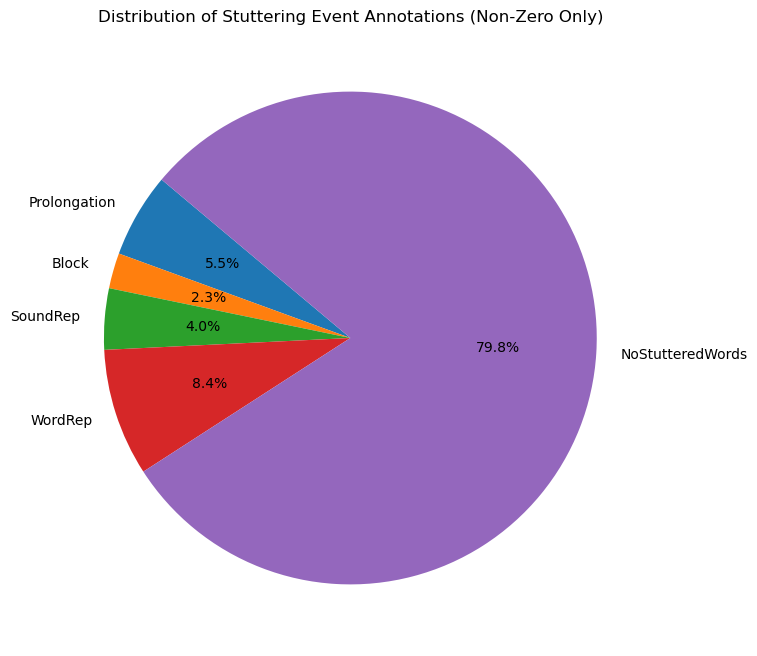

In [9]:
columns_to_sum = ['Unsure', 'PoorAudioQuality', 'Prolongation', 'Block', 'SoundRep', 'WordRep', 
                  'DifficultToUnderstand', 'Interjection', 'NoStutteredWords', 'NaturalPause', 
                  'Music', 'NoSpeech']

# Assuming final_filtered_data is your DataFrame after initial filtering
totals = final_filtered_data[columns_to_sum].sum()

# Calculate the percentage of each column
percentages = (totals / totals.sum()) * 100

# Remove categories contributing less than a certain threshold, let's try 2% to be more stringent
columns_to_remove = percentages[percentages < 0].index

# Remove rows where any of these less frequent columns have a non-zero value
final_filtered_data_cleaned = final_filtered_data[~(final_filtered_data[columns_to_remove] > 0).any(axis=1)]

# Assuming final_filtered_data_cleaned is your DataFrame after the comprehensive filtering
updated_totals = final_filtered_data_cleaned[columns_to_sum].sum()

# Filter out columns where the total is zero
non_zero_totals = updated_totals[updated_totals > 0]

# Now, create a pie chart only with non-zero totals
plt.figure(figsize=(10, 8))
plt.pie(non_zero_totals, labels=non_zero_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Stuttering Event Annotations (Non-Zero Only)')


In [12]:
final_filtered_data_cleaned.to_csv('data/filtered_clip_labels.csv', index=False)